# Data Collection

In [1]:
basis = 'def2-tzvp'
xc = 'pbe0'

In [2]:
mol_names = ['H2', 'CH4', 'Cl2', 'acetic_acid']

In [3]:
import sys
sys.path.append("../utils")
from shannon import calc_entropy
from adjust_molecule import init_mol_ob
import numpy as np

for mol_name in mol_names:
    mol_path = f"mols/mol/{mol_name}.mol"
    mol_ob = init_mol_ob(mol_path)

    entropies = []
    for l in range(80, 200):
        entropies.append(calc_entropy(mol_ob, basis, xc, l))

    outfile = f"data/resolution/{mol_name}_resolution.npy"
    with open(outfile, 'wb') as f:
        np.save(f, entropies)


/home/jose/.conda/envs/comp_chem/lib/python3.11/site-packages/openbabel/__init__.py:26: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF energy = -1.06865144587056
converged SCF en

# Data Analysis

In [3]:
y_h2 = np.load('data/resolution/H2_resolution.npy')
y_ch4 = np.load('data/resolution/CH4_resolution.npy')
y_cl2 =np.load('data/resolution/Cl2_resolution.npy')
y_acetic_acid = np.load('data/resolution/acetic_acid_resolution.npy')
x = np.arange(80, 200)

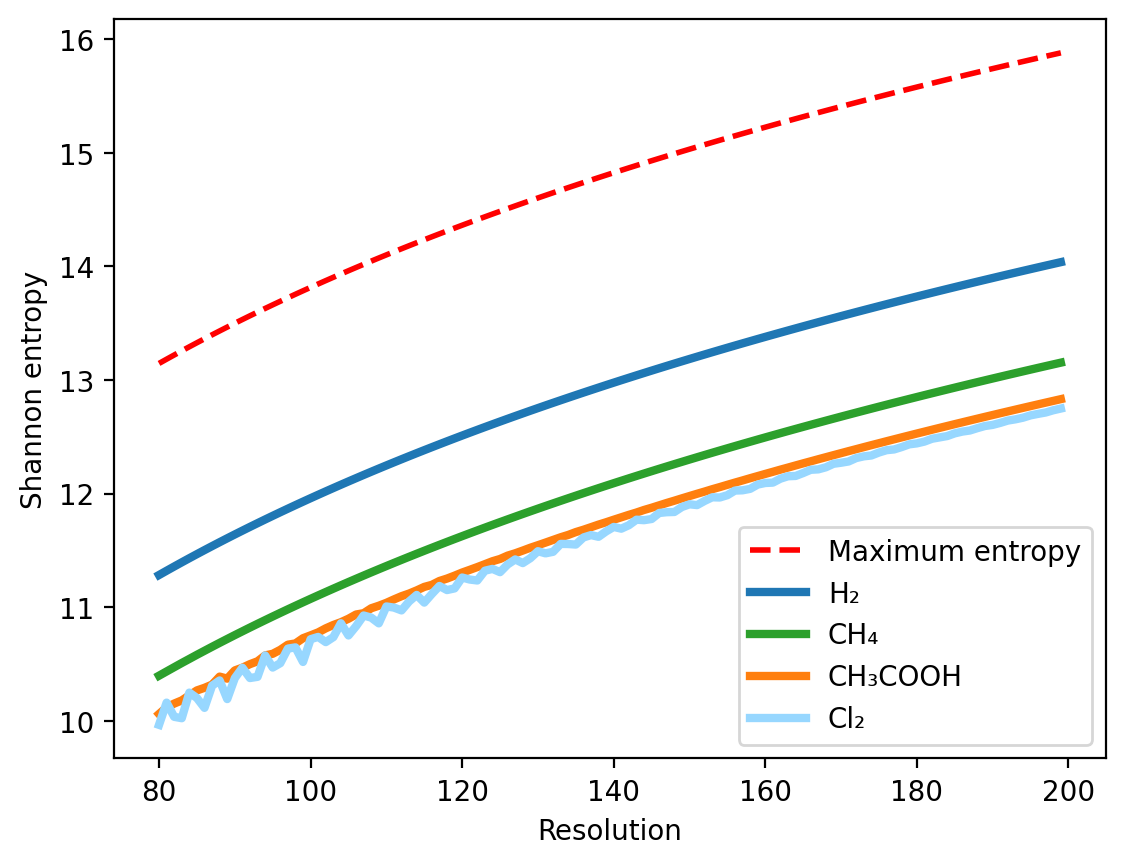

In [7]:
plt.figure(dpi=200.0)
plt.xlabel(xlabel='Resolution')
plt.ylabel('Shannon entropy')
plt.plot(x, 3 * np.log(x), color='red', label='Maximum entropy', linestyle='dashed', lw=2)
plt.plot(x, y_h2, color='#1f77b4', lw=3, label='H₂')  # Strong blue
plt.plot(x, y_ch4, color='#2ca02c', lw=3, label='CH₄') # Green
plt.plot(x, y_acetic_acid, color='#ff7f0e', lw=3, label='CH₃COOH') # Orange
plt.plot(x, y_cl2, color='#97D7FF', lw=3, label='Cl₂')
plt.legend()

<Figure size 2560x1920 with 0 Axes>

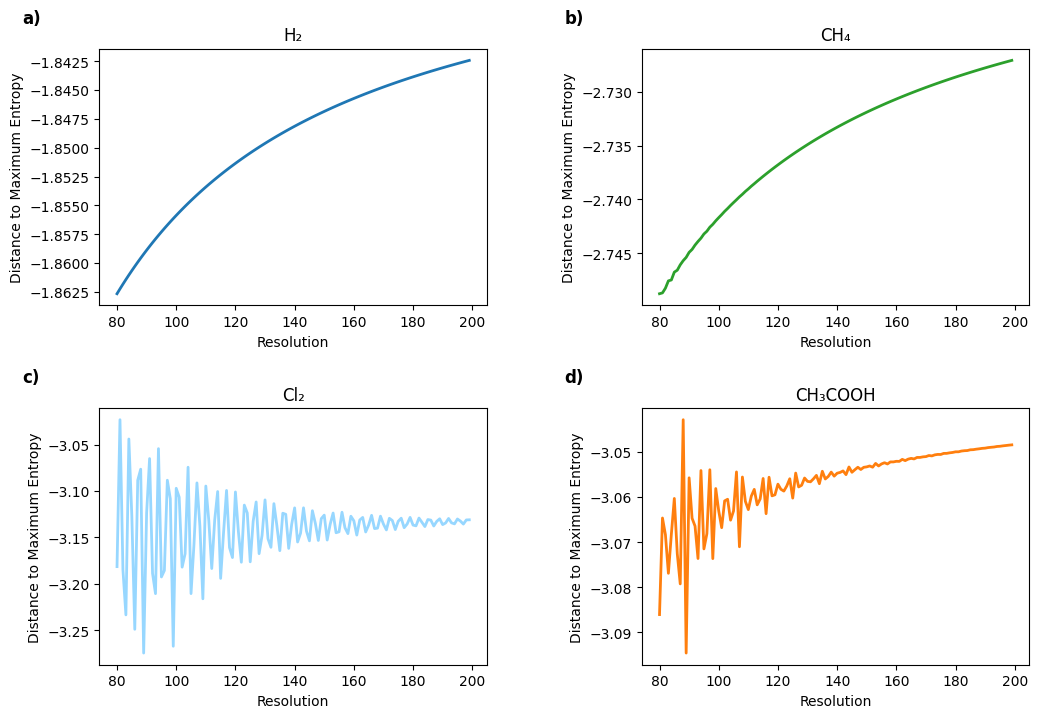

In [6]:
plt.figure(dpi=400.0)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Calculate differences from maximum entropy
diff_h2 = y_h2 - 3 * np.log(x)
diff_ch4 = y_ch4 - 3 * np.log(x)
diff_cl2 = y_cl2 - 3 * np.log(x)
diff_acetic = y_acetic_acid - 3 * np.log(x)

# Plot H₂
ax1.plot(x, diff_h2, color='#1f77b4', lw=2)
ax1.set_title('H₂')
ax1.set_xlabel('Resolution')
ax1.set_ylabel('Distance to Maximum Entropy')
ax1.text(-0.2, 1.1, 'a)', transform=ax1.transAxes, size=12, weight='bold')

# Plot CH₄
ax2.plot(x, diff_ch4, color='#2ca02c', lw=2)
ax2.set_title('CH₄')
ax2.set_xlabel('Resolution')
ax2.set_ylabel('Distance to Maximum Entropy')
ax2.text(-0.2, 1.1, 'b)', transform=ax2.transAxes, size=12, weight='bold')

# Plot Cl₂
ax3.plot(x, diff_cl2, color='#97D7FF', lw=2)
ax3.set_title('Cl₂')
ax3.set_xlabel('Resolution')
ax3.set_ylabel('Distance to Maximum Entropy')
ax3.text(-0.2, 1.1, 'c)', transform=ax3.transAxes, size=12, weight='bold')

# Plot Acetic Acid
ax4.plot(x, diff_acetic, color='#ff7f0e', lw=2)
ax4.set_title('CH₃COOH')
ax4.set_xlabel('Resolution')
ax4.set_ylabel('Distance to Maximum Entropy')
ax4.text(-0.2, 1.1, 'd)', transform=ax4.transAxes, size=12, weight='bold')

# Increase horizontal spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)


In [13]:
# Create a pandas DataFrame with entropy values at specific resolutions
import pandas as pd

# Find indices for resolutions 80 and 200 using np.isclose() to handle floating point comparison
idx_80 = 0
idx_200 = -1

# Create dictionary with data
data = {
    'Resolution 80': [y_h2[idx_80], y_ch4[idx_80], y_cl2[idx_80], y_acetic_acid[idx_80]],
    'Resolution 200': [y_h2[idx_200], y_ch4[idx_200], y_cl2[idx_200], y_acetic_acid[idx_200]]
}

# Calculate percentage change
data['Percent Change'] = [
    100 * (data['Resolution 200'][i] - data['Resolution 80'][i]) / data['Resolution 80'][i]
    for i in range(4)
]

# Create DataFrame with molecule names as index
df = pd.DataFrame(data, index=['H2', 'CH4', 'Cl2', 'CH3COOH'])

# Format percentage column to 2 decimal places
df['Percent Change'] = df['Percent Change'].map('{:.2f}%'.format)

# Display the table
display(df)


Resolution 80  Resolution 200 Percent Change
H2           11.283419       14.037482         24.41%
CH4          10.397310       13.152831         26.50%
Cl2           9.964625       12.748888         27.94%
CH3COOH      10.060042       12.831448         27.55%

In [37]:
# Create a pandas DataFrame with entropy values at specific resolutions
import pandas as pd

# Find indices for resolutions 80 and 200 using np.isclose() to handle floating point comparison
idx_80 = 0
idx_200 = -1

diff_h2 = y_h2 - 3 * np.log(x)
diff_ch4 = y_ch4 - 3 * np.log(x)
diff_cl2 = y_cl2 - 3 * np.log(x)
diff_acetic = y_acetic_acid - 3 * np.log(x)

# Create dictionary with data
data = {
    'Resolution 80': [diff_h2[idx_80], diff_ch4[idx_80], diff_cl2[idx_80], diff_acetic[idx_80]],
    'Resolution 200': [diff_h2[idx_200], diff_ch4[idx_200], diff_cl2[idx_200], diff_acetic[idx_200]]
}

# Calculate percentage change
data['Percent Change'] = [  
    100 * (data['Resolution 200'][i] - data['Resolution 80'][i]) / data['Resolution 80'][i]
    for i in range(4)
]
    
# Create DataFrame with molecule names as index
df = pd.DataFrame(data, index=['H2', 'CH4', 'Cl2', 'CH3COOH'])

# Format percentage column to 2 decimal places
df['Percent Change'] = df['Percent Change'].map('{:.2f}%'.format)

# Display the table
display(df)


Resolution 80  Resolution 200 Percent Change
H2           -1.862661       -1.842433         -1.09%
CH4          -2.748770       -2.727083         -0.79%
Cl2          -3.181455       -3.131026         -1.59%
CH3COOH      -3.086038       -3.048466         -1.22%

In [38]:
# Create dictionary with raw entropy, difference data, and CoPer
data = {
    'Shannon Entropy': {
        'Resolution 80': [y_h2[idx_80], y_ch4[idx_80], y_cl2[idx_80], y_acetic_acid[idx_80]],
        'Resolution 200': [y_h2[idx_200], y_ch4[idx_200], y_cl2[idx_200], y_acetic_acid[idx_200]]
    },
    'Distance to Maximum Entropy': {
        'Resolution 80': [diff_h2[idx_80], diff_ch4[idx_80], diff_cl2[idx_80], diff_acetic[idx_80]], 
        'Resolution 200': [diff_h2[idx_200], diff_ch4[idx_200], diff_cl2[idx_200], diff_acetic[idx_200]]
    },
    'CoPer': {
        'Resolution 80': [np.exp(diff_h2[idx_80]), np.exp(diff_ch4[idx_80]), np.exp(diff_cl2[idx_80]), np.exp(diff_acetic[idx_80])],
        'Resolution 200': [np.exp(diff_h2[idx_200]), np.exp(diff_ch4[idx_200]), np.exp(diff_cl2[idx_200]), np.exp(diff_acetic[idx_200])]
    }
}

# Calculate percentage changes
for metric in data:
    data[metric]['Percent Change'] = [
        100 * (data[metric]['Resolution 200'][i] - data[metric]['Resolution 80'][i]) / data[metric]['Resolution 80'][i]
        for i in range(4)
    ]

# Create multi-level DataFrame
molecules = ['H2', 'CH4', 'Cl2', 'CH3COOH']
df = pd.DataFrame({
    (metric, col): data[metric][col]
    for metric in data
    for col in data[metric]
}, index=molecules)

# Format percentage columns to 2 decimal places
df[('Shannon Entropy', 'Percent Change')] = df[('Shannon Entropy', 'Percent Change')].map('{:.2f}%'.format)
df[('Distance to Maximum Entropy', 'Percent Change')] = df[('Distance to Maximum Entropy', 'Percent Change')].map('{:.2f}%'.format)
df[('CoPer', 'Percent Change')] = df[('CoPer', 'Percent Change')].map('{:.2f}%'.format)

# Display the table
display(df)


Shannon Entropy                                \
          Resolution 80 Resolution 200 Percent Change   
H2            11.283419      14.037482        124.41%   
CH4           10.397310      13.152831        126.50%   
Cl2            9.964625      12.748888        127.94%   
CH3COOH       10.060042      12.831448        127.55%   

        Distance to Maximum Entropy                                \
                      Resolution 80 Resolution 200 Percent Change   
H2                        -1.862661      -1.842433         98.91%   
CH4                       -2.748770      -2.727083         99.21%   
Cl2                       -3.181455      -3.131026         98.41%   
CH3COOH                   -3.086038      -3.048466         98.78%   

                CoPer                                
        Resolution 80 Resolution 200 Percent Change  
H2           0.155259       0.158432        102.04%  
CH4          0.064007       0.065410        102.19%  
Cl2          0.041525       0.043673        105.17%  
CH3COOH      0.045683       0.047432        103.83%

# Entropy of images grow logarithmically with resolution

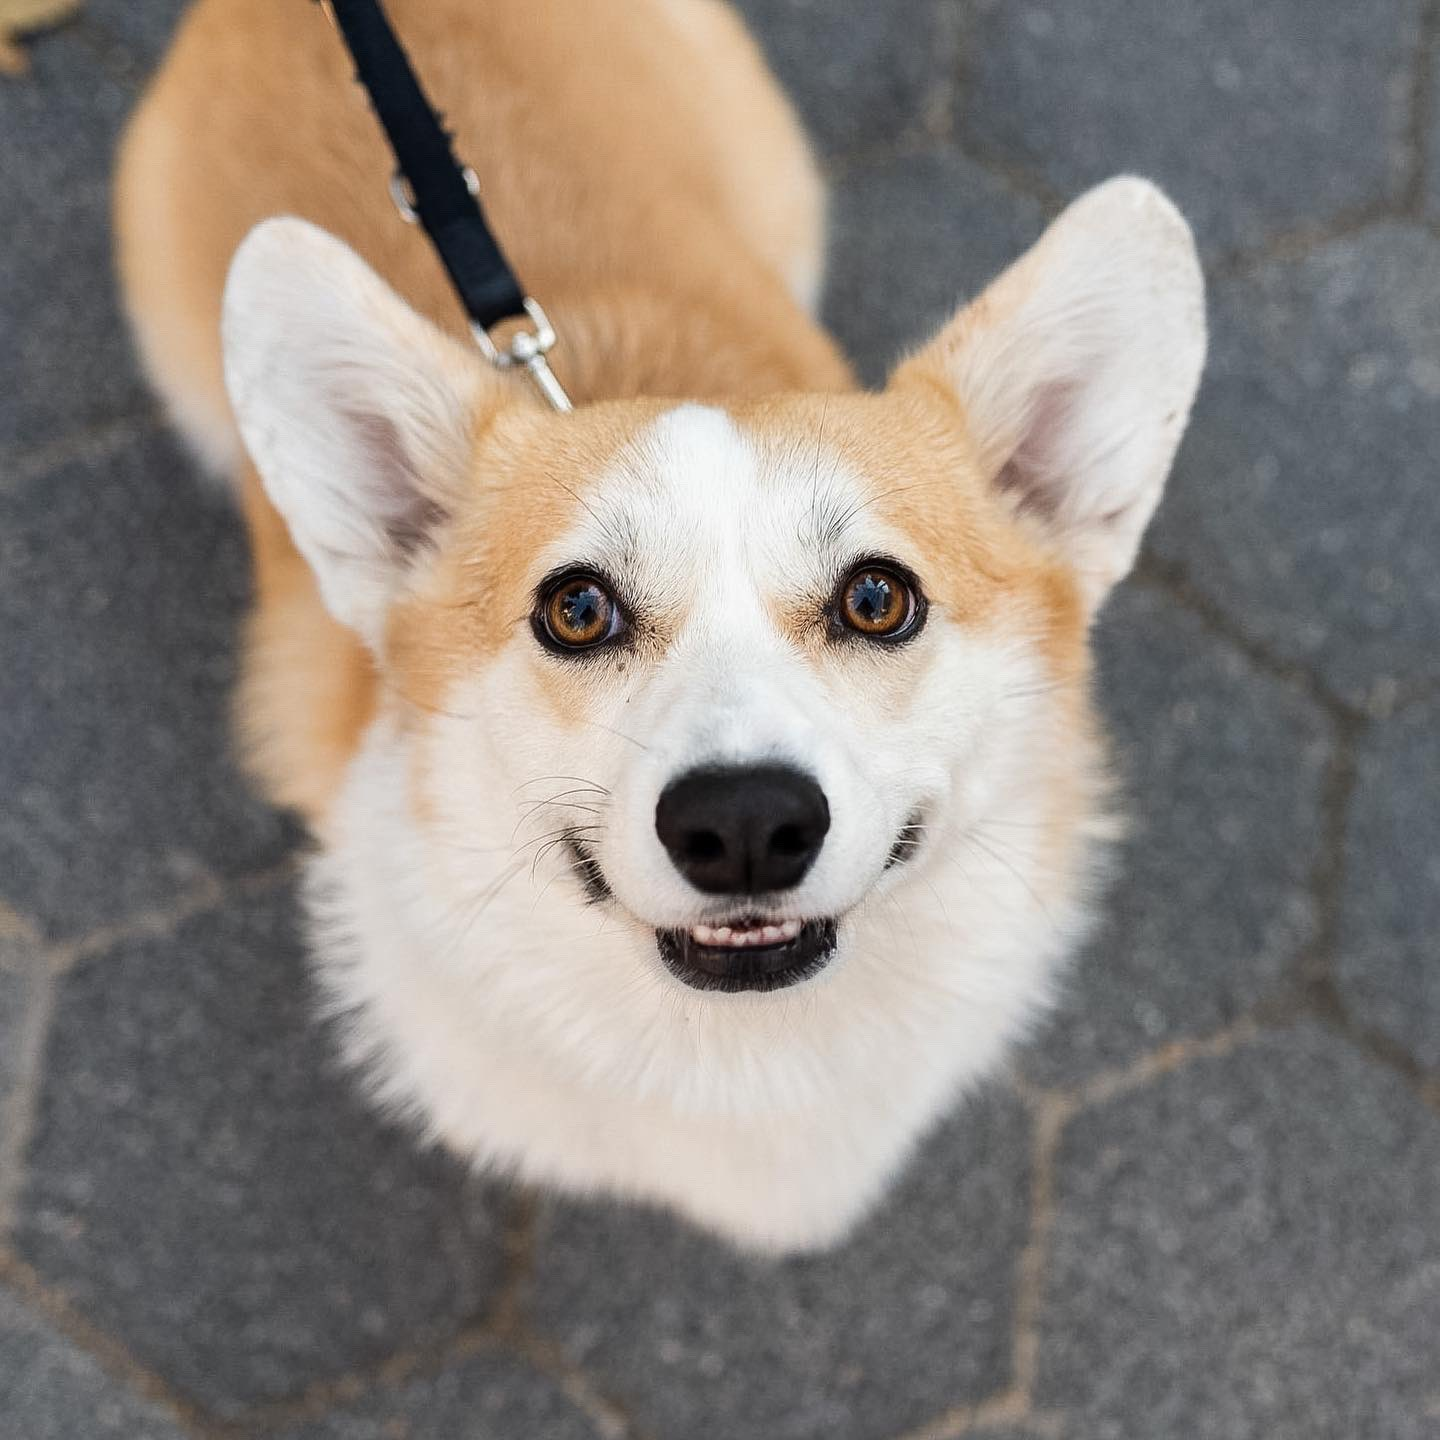

In [15]:
image = Image.open('data/corgi.jpg')
image

tensor(14.4462)


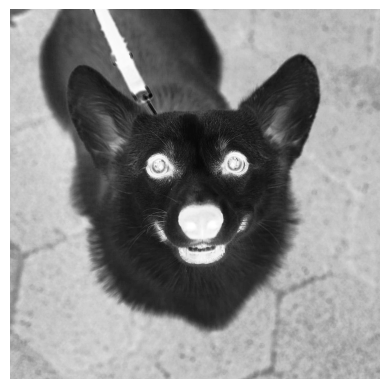

In [16]:
img_array = np.array(image)
a = torch.tensor(img_array[:, :, 0], dtype=torch.float).reshape(1, len(img_array), len(img_array)) + 1
print(entropy(a))
plt.axis('off')
plt.imshow(a.squeeze(), cmap='Greys')

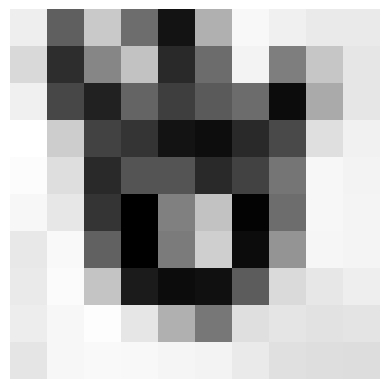

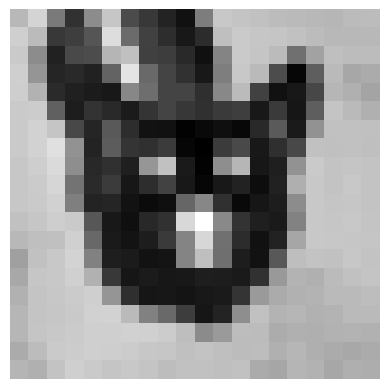

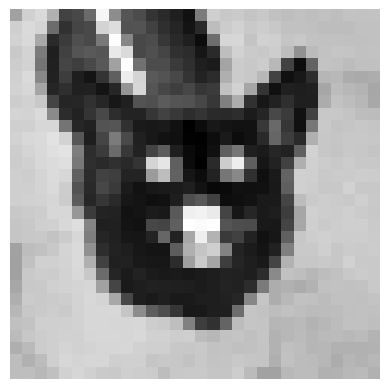

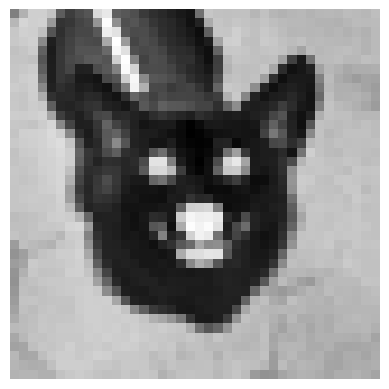

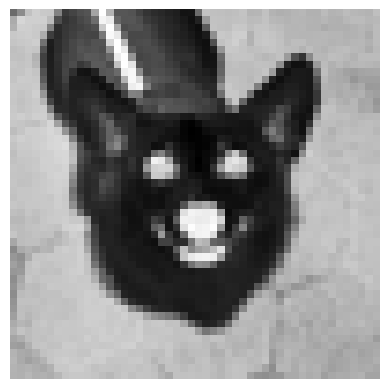

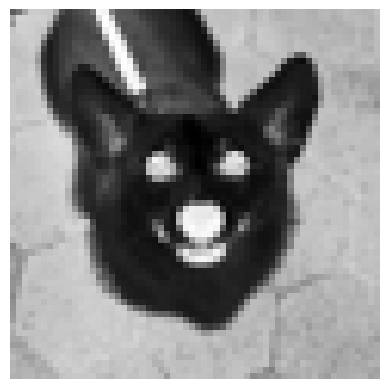

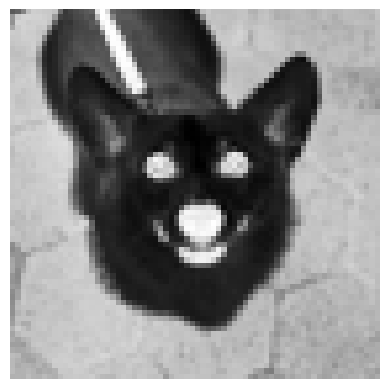

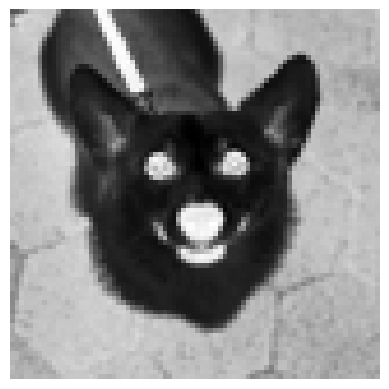

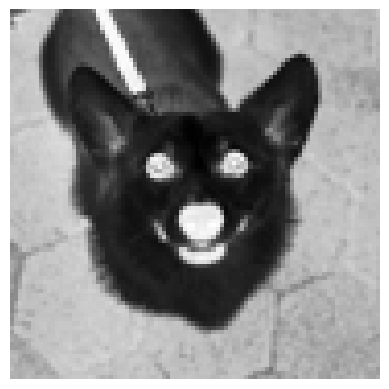

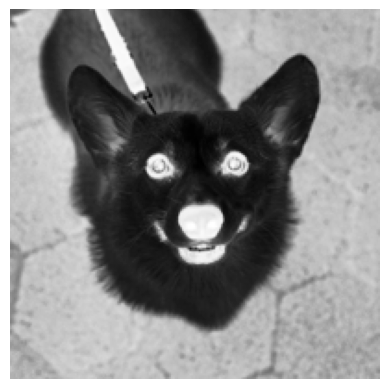

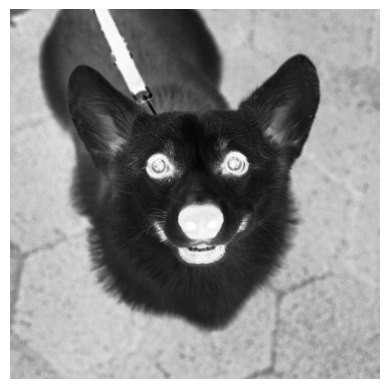

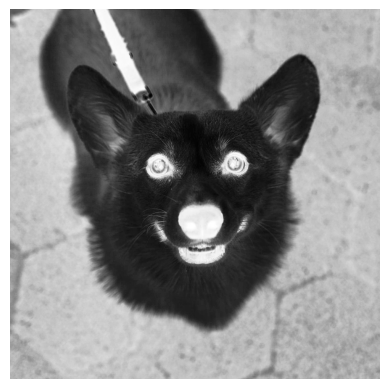

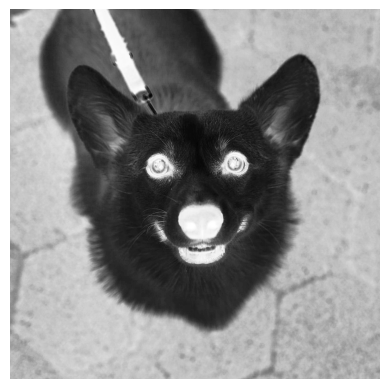

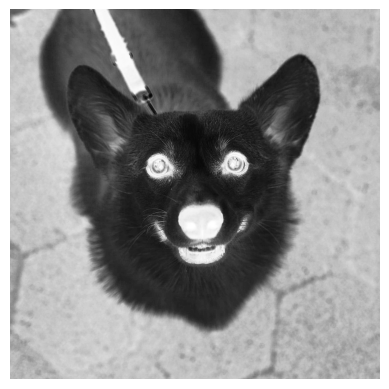

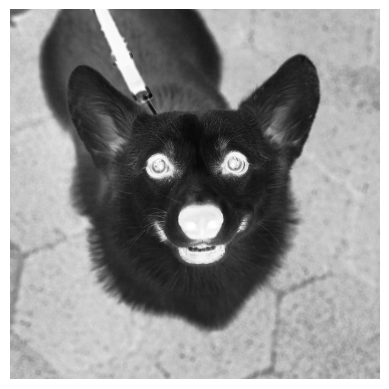

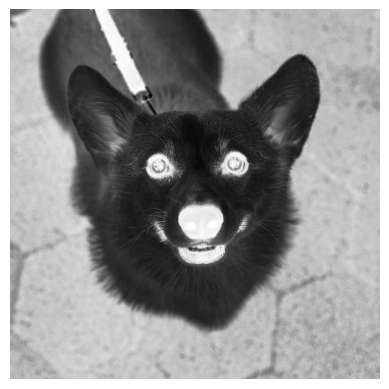

In [17]:
y = []
for i in range(1, 1441):
    resized_image = image.resize((i, i))
    img_array = np.array(resized_image)
    img_channel = torch.tensor(img_array[:, :, 0], dtype=torch.float).reshape(1, len(img_array), len(img_array)) + 1
    y.append(entropy(img_channel))
    if img_channel.shape[1] % 200 == 0 or (i < 100 and i % 10 == 0 and i > 1):
        plt.axis('off')
        plt.imshow(img_channel.detach().squeeze(), cmap='Greys')
        plt.show()
        plt.close()

/var/folders/83/q6p745y53rl_50j5g1hmd6540000gn/T/ipykernel_76174/1865951179.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, 2 * np.log(x), color='red', label='ln(l^2)', linestyle='dashed', lw=2)


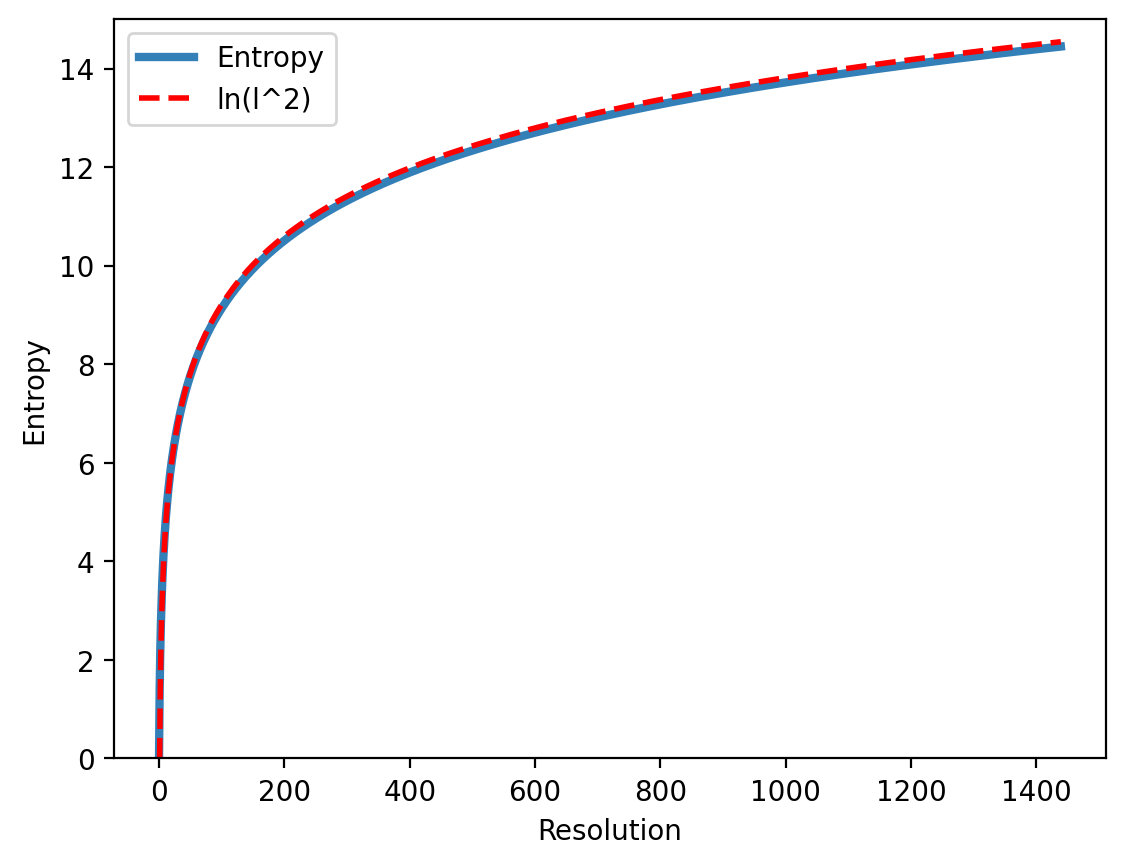

In [18]:
x = torch.arange(len(y))
plt.figure(dpi=200)
plt.xlabel('Resolution')
plt.ylabel('Entropy')
plt.ylim(0, 15)
plt.plot(x, y, color='#337FB7', label='Entropy', lw=3)
plt.plot(x, 2 * np.log(x), color='red', label='ln(l^2)', linestyle='dashed', lw=2)
plt.legend()

# Entropy of noise grows logarithmically with resolution

In [19]:
def downsample(x):
    kernel_size = 2  # You can choose a different kernel size
    custom_kernel = torch.ones(1, 1, kernel_size, kernel_size) / (kernel_size * kernel_size)
    avg_conv_layer = torch.nn.Conv2d(1, 1, kernel_size, padding=0, bias=False)  # Adjust input and output channels as needed
    avg_conv_layer.weight.data = custom_kernel

    return avg_conv_layer(x)

tensor(13.6226)


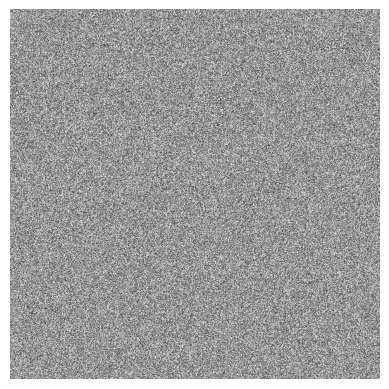

In [20]:
a = torch.rand((1,1000, 1000))
print(entropy(a))
plt.axis('off')
plt.imshow(a.squeeze(), cmap='Greys')

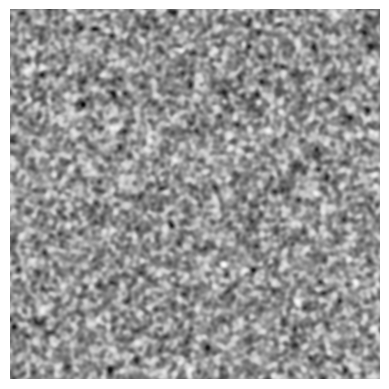

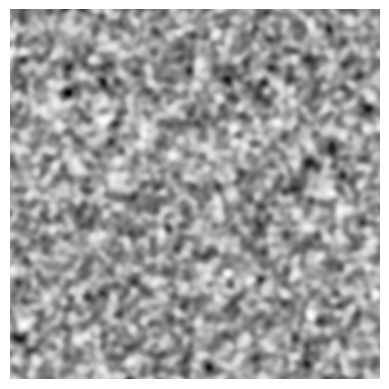

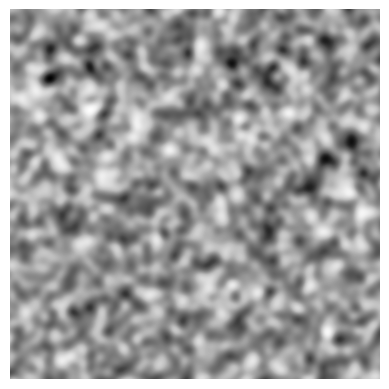

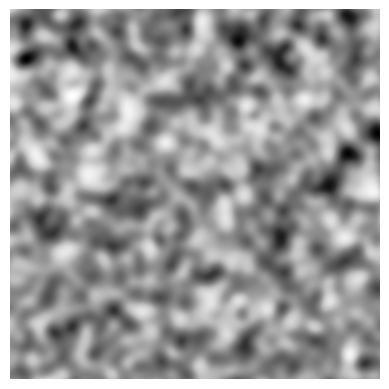

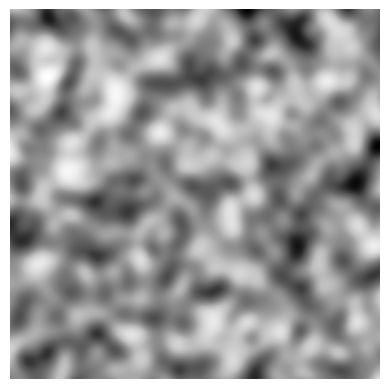

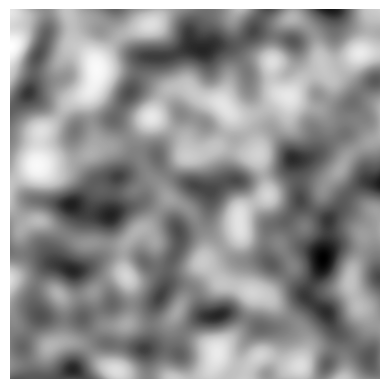

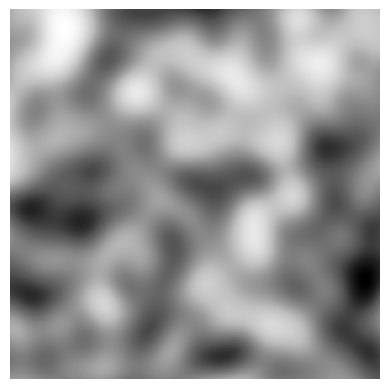

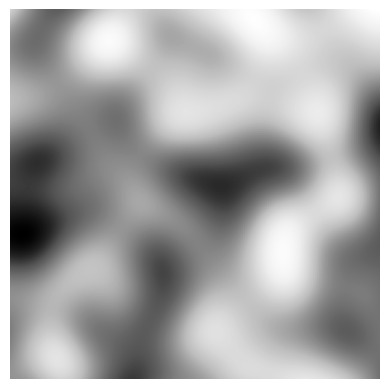

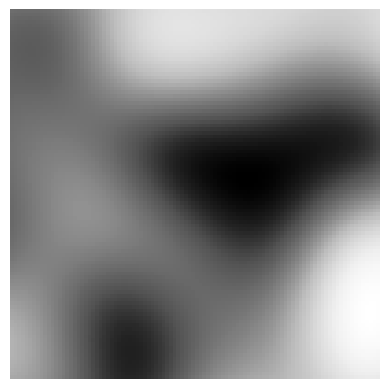

In [21]:
y = []
while a.shape[1] >= 2:
    y.append(entropy(a + 1))
    a = downsample(a)
    if a.shape[1] % 100 == 0:
        plt.axis('off')
        plt.imshow(a.detach().squeeze(), cmap='Greys')
        plt.show()
        plt.close()
y.append(entropy(a))
y.reverse()

/var/folders/83/q6p745y53rl_50j5g1hmd6540000gn/T/ipykernel_76174/1926351549.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, 2 * np.log(x), color='red', label='ln(l^2)', linestyle='dashed', lw=2)


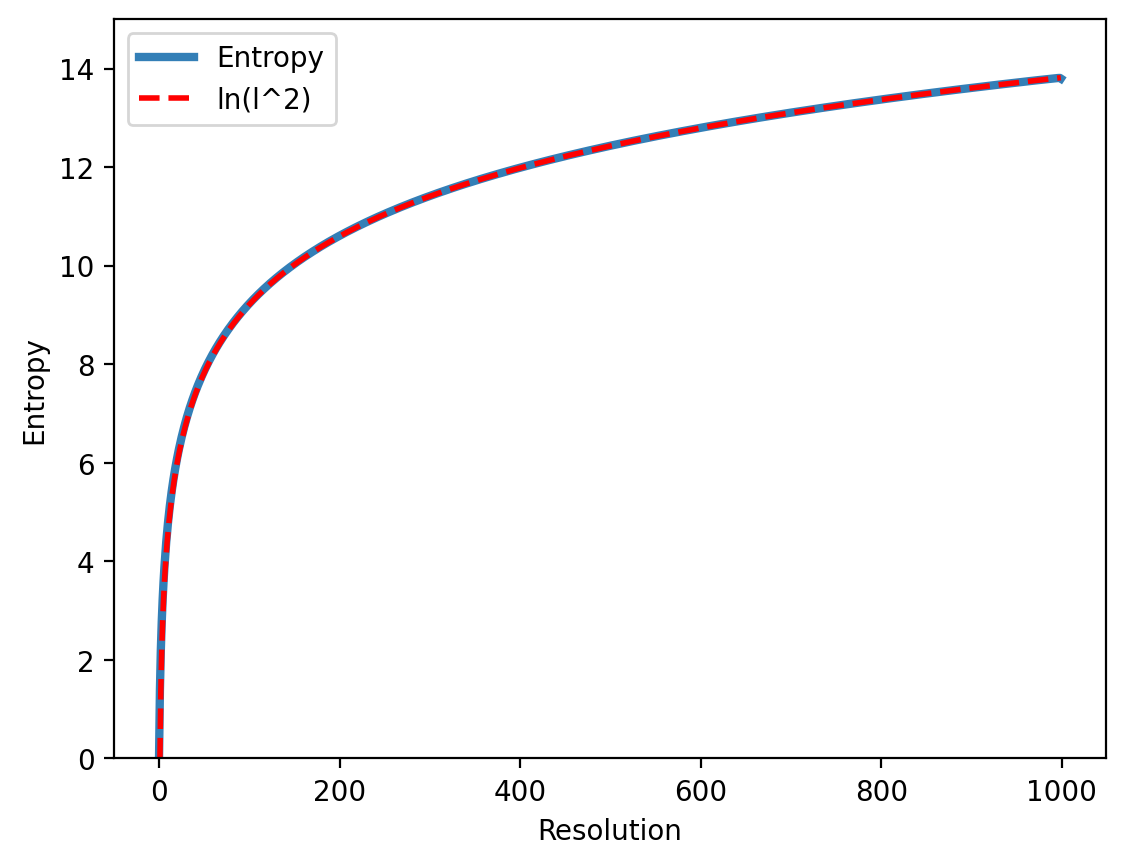

In [22]:
x = np.arange(len(y))
plt.figure(dpi=200)
plt.xlabel('Resolution')
plt.ylabel('Entropy')
plt.ylim(0, 15)
plt.plot(x, y, color='#337FB7', label='Entropy', lw=3)
plt.plot(x, 2 * np.log(x), color='red', label='ln(l^2)', linestyle='dashed', lw=2)
plt.legend()